In [3]:
#from ava_functions import *

In [4]:
## rigettando anche sulla base del ppp

In [5]:
#import os
#os.chdir('../../../Desktop/Criticality in barrel cortex')

In [6]:
#from power import *
##from powerlaw_fit import *
#from stats import *
import matplotlib.cm as cm
cmap = cm.tab10

In [7]:
from statsmodels.tsa.stattools import acf
def x_autocorr_sm(x_data,nrep = 100, q = [2.5,97.5]):
    '''
    autocorrelation using statsmodels.
    faster for longer timeseries dueto use of fft
    - x_data timeseries
    - nrep, int, number of random realizations for null model 
    - q, percentiles for error

    Support: tau= 1,2,...,N/2 where N=len(x_data)
    '''

    N = int( len(x_data)/2 )
    x = np.arange(N+1)
    y = acf(x_data,fft=True,nlags=N)
    
    N = int( len(x_data)/2 )
    x = np.arange(N+1)
    y_original = np.zeros((nrep,N+1))
    
    for i_nrep in range(nrep):
        ## periodic boundary conditions with randomly selected starting point
        i_rand = np.random.randint(N)
        x_data_i = np.append(x_data[i_rand:],x_data[:i_rand])
        y_original[i_nrep,:] = acf(x_data_i,fft=True,nlags=N)#[1:]

    
    y_mu = np.mean(y_original,axis=0)
    y_1,y_2 = np.percentile(y_original,q=q,axis=0)
    result = {}
    result['tau'] = x
    result['C'] = np.array([y_mu,y_1,y_2])
    return result

In [8]:
def plot_corr(x, y_mu, y_1,y_2, y_mu_rand, y_1_rand,y_2_rand, tau_star):
    plt.rcParams['font.size'] = 18
    fig, ax = plt.subplots(nrows=1, ncols=1)#, figsize=fig_size)
    lw = 2
    alpha_val = .5
    ## Plot the empirical autocorrelation
    x_ = x
    y_ = y_mu
    z1_ = y_1
    z2_ = y_2
    c_ = cmap(0)
    ax.plot(x_,y_,c = c_,lw=lw, label = 'Data')
    ax.fill_between(x_,z1_,z2_,color=c_,alpha=alpha_val,lw=0)



    ## Plot the randomized autocorrelation
    x_ = x
    y_ = y_mu_rand
    z1_ = y_1_rand
    z2_ = y_2_rand
    c_ = cmap(1)
    ax.plot(x_,y_,c = c_,lw=lw, label = 'Randomized')
    ax.fill_between(x_,z1_,z2_,color=c_,alpha=alpha_val,lw=0)


    ax.plot([tau_star,tau_star],[-1,1],lw=1,color='black',ls=':')


    ## Layout stuff
    ax.legend(loc='upper right')

    ax.set_xscale('log')
    # ax.set_yscale('log')

    ax.set_xlabel(r'Time Lag, $\tau$')#,labelpad=0)
    ax.set_ylabel(r'$C(\tau)$')
    ax.set_ylim(-0.1,0.3)


    x_annot_tau = 0.8
    y_annot_tau = 0.6
    ax.annotate(r'$\tau^*=%s$'%(int(tau_star)),xy=(x_annot_tau,y_annot_tau),xycoords = 'axes fraction')

In [9]:
def x_autocorr_sm_ext(x_data,nrep = 100, q = [2.5,97.5]):
    '''
    autocorrelation using statsmodels.
    faster for longer timeseries dueto use of fft
    - x_data timeseries
    - nrep, int, number of random realizations for null model 
    - q, percentiles for error

    Support: tau= 1,2,...,N/2 where N=len(x_data)
    '''

    N = int( len(x_data)/2 )
    x = np.arange(N+1)
    y_original = np.zeros((nrep,N+1))
    y_random = np.zeros((nrep,N+1))
    for i_nrep in range(nrep):
        ## periodic boundary conditions with randomly selected starting point
        i_rand = np.random.randint(N)
        x_data_i = np.append(x_data[i_rand:],x_data[:i_rand])
        y_original[i_nrep,:] = acf(x_data_i,fft=True,nlags=N)#[1:]

        ## randomize
        np.random.shuffle(x_data_i)
        y_random[i_nrep,:] =  acf(x_data_i,fft=True,nlags=N)#[1:]


    y_mu = np.mean(y_original,axis=0)
    y_1,y_2 = np.percentile(y_original,q=q,axis=0)

    y_mu_rand = np.mean(y_random,axis=0)
    y_1_rand,y_2_rand = np.percentile(y_random,q=q,axis=0)

    result = {}
    result['tau'] = x
    result['C'] = [y_mu,y_1,y_2]
    result['C_rand'] = [y_mu_rand,y_1_rand,y_2_rand]
    result['tmp'] = [y_original,y_random]
    return result

In [10]:
cd "../../../Downloads/NewbornEEGData-20220203T094950Z-001/NewbornEEGData/"

C:\Users\Benedetta\Downloads\NewbornEEGData-20220203T094950Z-001\NewbornEEGData


In [11]:
import numpy as np
import matplotlib.pyplot as plt
import os
import pandas as pd
import powerlaw as pwl

In [12]:
good_sub = np.array([ 5,  6,  9, 11, 12, 16, 17, 18, 19, 23, 30, 33, 35, 37, 40, 45, 47,
       49, 52, 56, 58, 62, 66, 67, 68, 71, 14, 22, 27, 41, 46, 64])

In [13]:
## ORDER OF THE LANGUAGES
order = pd.read_excel('../../../Downloads/ordine lingue.xlsx')#1 en, 2 fr, 3 sp


subject_french = order[order["last language"]==2]["subject"].values

subject_en = order[order["last language"]==1]["subject"].values

subject_span = order[order["last language"]==3]["subject"].values

sub_fren = (list(set(subject_french) & set(good_sub)))
sub_span = (list(set(subject_span) & set(good_sub)))
sub_en = (list(set(subject_en) & set(good_sub)))


good_sub = np.asarray(good_sub)

#index. = np.where()

type(good_sub)

h = []
for k in sub_fren:
    #if k in good_sub:
    #h.append(np.where(k == good_sub)[0])
    h.append(good_sub.tolist().index(k))
print(h)        
#np.concatenate(h)

ll = np.concatenate([np.where(good_sub==i)[0] for i in sub_fren])

ll

def funct(sub, vec1, vec2):
    index = np.concatenate([np.where(good_sub==i)[0] for i in sub])
    #index = np.where(good_sub, sub_fren)
    al1 = vec1[index]
    al2 = vec2[index]
    print(stats.ttest_rel(al1, al2,alternative = 'less') )
    
    

def funct2(sub, vec1):
    index = np.concatenate([np.where(good_sub==i)[0] for i in sub])
    #index = np.where(good_sub, sub_fren)
    al1 = vec1[index]
    #al2 = vec2[index]
    return al1
    #print(stats.ttest_rel(al1, al2,alternative = 'less') )
    

[22, 23, 13, 2, 29, 3, 4, 16, 5, 7, 27, 19]


In [14]:
import scipy.io
import scipy.signal
from scipy.signal import argrelextrema
from scipy.optimize import curve_fit
from statsmodels.tsa.stattools import acf, ccf
def monoExp(t, tau, a):
    """
    Exponetial function, starting at 1 in t = 0.

    Parameters
    ----------
    t : numpy.ndarray
        Time.
    tau : float
        Autocorrelation time.
    a : float
        Scale factor.

    Returns
    -------
    numpy.ndarray
        Exponential function.
    """
    return a*(np.exp(-t/tau) - 1) + 1


def monoExp2(t, tau, a):
    """
    Exponetial function, starting at 1 in t = 0.

    Parameters
    ----------
    t : numpy.ndarray
        Time.
    tau : float
        Autocorrelation time.
    a : float
        Scale factor.

    Returns
    -------
    numpy.ndarray
        Exponential function.
    """
    return -(a*(np.exp(-t/tau) - 1) +1)

def fit_envelope_autocorr(data, delta_t = 0.002):
    """
    Fit the exponential envelope of the autocorrelation function.

    Parameters
    ----------
    autocorr : numpy.ndarray
        Autocorrelation functions. Each row is the autocorrelation
        for a given channel.
    delta_t : float, optional
        Sampling time of the experimental signals.
        The default is 0.002s.

    Returns
    -------
    tcorr : numpy.ndarray
        Autocorrelation times for each channel.
    """

    maxima = argrelextrema(data, np.greater, order = 100)[0]
    minima = argrelextrema(data, np.less, order = 100)[0]

    x_to_fit = np.insert(maxima,0,0)
    g = data[maxima]
    y_to_fit = np.insert(g,0,1)
    params_max, _ = curve_fit(monoExp, x_to_fit, y_to_fit, (250, 1))
    #print(params_max)
    

    
    x_to_fit = np.insert(minima,0,0)
    g = data[minima]
    y_to_fit = np.insert(g,0,-1)
    
    params_min, _ = curve_fit(monoExp, x_to_fit, y_to_fit, (250, 1))
    #print(params_min)
    
    tcorr = (params_max[0] + params_min[0])/2*delta_t
            
    return tcorr
#params_max[0]*delta_t


In [15]:
np.insert(np.array([1,2,3]),0,0)

array([0, 1, 2, 3])

## EEg DFA analysis

In [16]:
### COMPARISON BETWEEN SILENCE1 AND SILENCE2

import os
import numpy as np
import scipy.signal as ss
import scipy.io
#from dfa_functions import *
ch_names = ['F7', 'F3', 'Fz', 'F4', 'F8', 'T7', 'C3', 'Cz', 'C4', 'T8']
ch_names = np.array(ch_names)
subjs  = [5,6,9,11,12,13,16,17,18,19,21,23,24,25,30,33,34,35,37,39,40,45,47,49,52,53,56,57,58,60,62,63,65,66,67,68,69,71,14,20,22,27,28,29,31,41,46,64,70]
## you can discard subjec t 23 and 24

import numpy as np
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
from scipy.io import loadmat
from scipy.signal import welch
import pandas as pd
import mne


ch_names = np.array(ch_names)
sfreq = 500
info = mne.create_info(ch_names = list(ch_names),
                       ch_types = 'eeg',
                       sfreq = sfreq)
def find_bad_channels(data, MAX_PEAK=200, MAX_PEAK_SIGMA=15, MAX_DIST_PS=4.5e-3, OFFSET=30, fmin=1, fmax=100, 
                      verbose = True):
    idx_down, idx_up = 0, data.shape[1]
    ss = np.std(data)
    
    psds, freqs = mne.time_frequency.psd_welch(mne.io.RawArray(data/1e6, info, verbose=False), fmin=fmin, fmax=fmax, n_fft=2048, n_overlap=1024/2, verbose=False)
    psds = np.log10(psds)
    
    dist = [((tmp-psds.mean(axis=0))**2).sum() for tmp in psds]
    dist = np.array(dist) / (psds**2).sum() * 1e2
    
    rej = []
    for i, ch in enumerate(ch_names):
        delta = np.abs(data[i]).max()
    
        str_rej = str()

        if delta>MAX_PEAK or dist[i]>MAX_DIST_PS:
            rej.append(ch)
            str_rej = '-> rejected'
            str_rej += ' ('
            if delta>MAX_PEAK:
                str_rej += ' peak'
                idx = np.where(np.abs(data[i])>MAX_PEAK)[0]
            
            if dist[i]>MAX_DIST_PS:
                str_rej += ' ps'
            str_rej += ')'
            
        if verbose: print(f'* {ch}: max peak = {np.round(delta, 2)} mV ({np.round(delta/ss, 2)} std); dist ps = {np.round(dist[i],3)} '+str_rej)
        
        if delta>MAX_PEAK:
            if np.max(idx)/sfreq<OFFSET:
                idx_down = np.max([np.max(idx),idx_down])
                if verbose: print(f'[*] WARNING: Peak only in the initial part - time: {np.max(idx)/sfreq} s')
            if np.min(idx)/sfreq>180-OFFSET:
                idx_up = np.min([np.min(idx),idx_up])
                if verbose: print(f'[*] WARNING: Peak only in the last part - time: {np.min(idx)/sfreq} s')
    if verbose: print('\nBad channels:', rej, '\n')
    return rej, idx_down, idx_up

In [17]:
##  diceva di controllare time scales david poeppel

In [18]:
### COMPARISON BETWEEN SILENCE1 AND SILENCE2

import os
import numpy as np
import scipy.signal as ss
import scipy.io
from dfa_functions import *

overlap =0.5
bands = [[1,3],[4,8],[8,13],[14,30],[31,60]]
labels = ['band-1', 'band-2', 'band-3', 'band-4', 'band-5']
subjs  = [5,6,9,11,12,13,16,17,18,19,21,23,24,25,30,33,34,35,37,39,40,45,47,49,52,53,56,57,58,60,62,63,65,66,67,68,69,71,14,20,22,27,28,29,31,41,46,64,70]
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
from scipy.io import loadmat
from scipy.signal import welch
import pandas as pd
import mne

hh = 14 ## checl varying also hh, questo lo posso fare a posteriori e mi sa che lo avevo fatto, quindi era robusto
ch_names = ['F7', 'F3', 'Fz', 'F4', 'F8', 'T7', 'C3', 'Cz', 'C4', 'T8']
ch_names = np.array(ch_names)
sfreq = 500

In [19]:
from dfa_functions import *

In [42]:
len(DFA_2[5][0]## canali)

10

In [64]:
DFA_1 =[[] for i in range(len(good_sub))]
DFA_2 =[[] for i in range(len(good_sub))]
o = 0
for i, subj in enumerate(subjs):
    dfa_sil_params = [[] for r in range(len(bands)-1)]
    dfa_sil2_params = [[] for r in range(len(bands)-1)]
    #print(f'\n\n########## SUBJ {subj} ({i+1}/{len(subjs)})##########')
    s1 = loadmat(f'BB{subj}_Filtered (1-100)/Silence (500)/BB{subj} silence1 (continuous).mat')
    s2 = loadmat(f'BB{subj}_Filtered (1-100)/Silence (500)/BB{subj} silence2 (continuous).mat')
    
    
    data = s1['eeg_rest'].astype('float')
    print(data.shape[1]/500)
    rej, idx_down, idx_up = find_bad_channels(data, verbose = False)
    if idx_down > 0 or idx_up < data.shape[1]:
        if idx_down > 0:
            idx_down +=1
        if idx_up < data.shape[1]:
            idx_up -= 1
        data = data[:,idx_down:idx_up]
        rej, idx_down, idx_up = find_bad_channels(data, verbose = False)
    idx_accepted = np.sort([np.where(ch_names == i)[0][0] for i in list(set(ch_names) - set(rej))])
    data = data[list(idx_accepted), idx_down:idx_up][:, :71463] #try
    nchan = data.shape[0]
    
    data2 = s2['eeg_rest'].astype('float')
    print(data2.shape[1]/500)
    rej, idx_down, idx_up = find_bad_channels(data2, verbose = False)
    if idx_down > 0 or idx_up < data2.shape[1]:
        if idx_down > 0:
            idx_down +=1
        if idx_up < data2.shape[1]:
            idx_up -= 1
        data2 = data2[:,idx_down:idx_up]
        rej, idx_down, idx_up = find_bad_channels(data2, verbose = False)
    idx_accepted = np.sort([np.where(ch_names == i)[0][0] for i in list(set(ch_names) - set(rej))])
    data2 = data2[list(idx_accepted), idx_down:idx_up][:, :71463] #try #  questo lo posso modificare solo da qui
    nchan2 = data2.shape[0]
    
    if nchan >= 5 and nchan2 >=5 and subj!=53:
        #print('doing')
        for band in range(1,len(bands)):
            nn= int((2/bands[band][0])*500)
            low = bands[band][0]
            high = bands[band][1]
            filt = True
            bb =ss.firwin(nn,[low,high],pass_zero = False, fs = 500)
            aa = 1
            if filt: 
                filtered = ss.filtfilt(bb,aa,data,axis =1, padlen = 500)
            else:
                filtered =data
            for g in range(nchan):
                asil,bsil,esil = dfa(np.abs(ss.hilbert(filtered[g])), scale_lim =(3,hh),overlap =  overlap, det = 1)
                dfa_sil_params[band-1].append(np.array([asil,bsil,esil]))

            if filt: 
                filtered = ss.filtfilt(bb,aa,data2,axis =1, padlen = 500)
            else:
                filtered = data2
                
                
                
            for g in range(nchan2):
                asil,bsil,esil = dfa(np.abs(ss.hilbert(filtered[g])), scale_lim =(3,hh),overlap =  overlap, det = 1)
                dfa_sil2_params[band-1].append(np.array([asil,bsil,esil]))

        DFA_1[o] = (dfa_sil_params)
        DFA_2[o] = (dfa_sil2_params)
        o+=1
    #if i ==0: break

180.286
188.766
180.236
188.316
180.27
189.194
180.272
189.74
180.322
189.458
180.288
188.45
180.32
189.32
180.238
186.714
180.274
187.092
180.278
189.276
180.284
188.636
180.266
189.13
180.25
190.528
180.324
187.892
180.288
189.442
180.246
194.122
180.25
188.17
180.354
188.032
180.246
188.344
180.322
190.292
180.33
188.484
180.274
189.766
180.262
207.378
180.32
201.342
180.286
208.028
180.29
90.598
180.258
189.098
180.264
188.76
180.25
189.528
180.15
192.734
180.288
208.422
180.298
200.088
180.294
189.378
180.27
192.518
180.278
191.454
180.338
190.718
180.288
190.558
180.294
200.258
180.222
187.464
180.25
188.85
180.306
187.944
180.268
187.53
180.298
186.792
180.338
154.954
180.28
189.89
180.234
190.122
180.284
210.666
180.27
191.812
180.298
198.828


In [66]:
np.asarray(DFA_1).shape

C:\Users\Benedetta\AppData\Local\Temp\ipykernel_6492\378440722.py:1: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  np.asarray(DFA_1).shape


(32, 4)

In [ ]:
## in teoria dopo un tot correlazioni divrebbero convergere (come si fa in autocorr)

In [216]:
good_sub = np.asarray(good_sub, dtype = int)
## ORDER OF THE LANGUAGES
order = pd.read_excel('../../../Downloads/ordine lingue.xlsx')#1 en, 2 fr, 3 sp


subject_french = order[order["last language"]==2]["subject"].values

subject_en = order[order["last language"]==1]["subject"].values

subject_span = order[order["last language"]==3]["subject"].values

sub_fren = (list(set(subject_french) & set(good_sub)))
sub_span = (list(set(subject_span) & set(good_sub)))
sub_en = (list(set(subject_en) & set(good_sub)))


good_sub = np.asarray(good_sub)

#index. = np.where()

type(good_sub)

h = []
for k in sub_fren:
    #if k in good_sub:
    #h.append(np.where(k == good_sub)[0])
    h.append(good_sub.tolist().index(k))
print(h)        
#np.concatenate(h)

ll = np.concatenate([np.where(good_sub==i)[0] for i in sub_fren])

ll

def funct(sub, vec1, vec2):
    index = np.concatenate([np.where(good_sub==i)[0] for i in sub])
    #index = np.where(good_sub, sub_fren)
    al1 = vec1[index]
    al2 = vec2[index]
    print(stats.ttest_rel(al1, al2,alternative = 'less') )
    
    

def funct2(sub, vec1):
    index = np.concatenate([np.where(good_sub==i)[0] for i in sub])
    #index = np.where(good_sub, sub_fren)
    al1 = vec1[index]
    #al2 = vec2[index]
    return al1
    #print(stats.ttest_rel(al1, al2,alternative = 'less') )
    a

[22, 23, 13, 2, 29, 3, 4, 16, 5, 7, 27, 19]


In [121]:
DFA_1 = np.asarray(DFA_1)
DFA_2 = np.asarray(DFA_2)

C:\Users\Benedetta\AppData\Local\Temp\ipykernel_6492\2791826772.py:1: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  DFA_1 = np.asarray(DFA_1)
C:\Users\Benedetta\AppData\Local\Temp\ipykernel_6492\2791826772.py:2: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  DFA_2 = np.asarray(DFA_2)


In [90]:
cleans = []
bands = [[4,8],[8,13],[14,30],[31,60]]
xminn = np.log2( (3/np.array(bands)[:,0])*500)
xminn[-1] = xminn[-1] + 2
for band in range(4):
    o = 0
    clean = pd.DataFrame(columns = ['Silence', 'DFAexp', 'sub_id', 'ch' ],  index = np.arange(0,574,1), dtype = 'float')
    for j in range(len(good_sub)):
        param =np.asarray(DFA_1[j][band])
        ntrial = param.shape[0]
        param = np.array(param).reshape(ntrial,3,-1)
        #dfa_sil_subjects = [[] for r in range(ntrial)]
        for r in range(ntrial):
            c = plot_fluct(param[r,0],param[r,1],param[r,2],xmin = xminn[band], xmax = 13.4)
            clean.iloc[o]["DFAexp"] = float(c[0])
            clean.iloc[o]["sub_id"]  = funct2(good_sub, good_sub)[j]
            clean.iloc[o]["ch"] = int(r)
            o+=1
    
    for j in range(len(good_sub)):
        param =np.asarray(DFA_2[j][band])
        ntrial = param.shape[0]
        param = np.array(param).reshape(ntrial,3,-1)
        #print(param.shape)
        #dfa_sil_subjects = [[] for r in range(ntrial)]
        for r in range(ntrial):
            c = plot_fluct(param[r,0],param[r,1],param[r,2],xmin = xminn[band], xmax = 13.4)
            #print(c[0])
            clean.iloc[o]["DFAexp"] = float(c[0])
            clean.iloc[o]["sub_id"]  = funct2(good_sub, good_sub)[j]
            clean.iloc[o]["ch"] = int(r)
            o+=1
    
    clean["Silence"] = ["1" for r in range(278) ]+ ["2" for r in range(296)]
    cleans.append(clean)  

(10, 3, 44)
0.7183754380894529
0.7292804883316983
0.7838849616540343
0.7752287184124476
0.828094659822265
0.7151898756584681
0.6667249495682491
0.6880339907971541
0.6762440324949148
0.8009588168640988
(10, 3, 44)
0.7549495280900131
0.7540921579201684
0.751359399965777
0.6642160950186113
0.6591540701971985
0.7270961446630451
0.7523710737690128
0.7047075922833588
0.6642041545773192
0.6593201025837869
(10, 3, 44)
0.6966883695556575
0.7407286953867506
0.7437829059858546
0.7552822216368159
0.7363214924357975
0.779840706354463
0.7396917380512636
0.7155506140960566
0.7569895684913993
0.690462598465303
(10, 3, 44)
0.8438251007980659
0.8253286751065848
0.7773099909804091
0.7970428422474376
0.7648353834494902
0.8020973813838899
0.7985992741229248
0.7942448351746435
0.788394718347712
0.7963622173931484
(7, 3, 44)
0.8125349356140451
0.7994098319415632
0.8270292249498041
0.7879797847070598
0.7462716361635526
0.7586385770513543
0.89497790803006
(10, 3, 44)
0.8533731770464134
0.7819991821521408
0.778

0.8037790030934049
0.8605889282103931
0.8554973831812812
(10, 3, 44)
0.8479211100989084
0.8722949753917757
0.8975160436223492
0.8413474490155317
0.8412018788512404
0.8216375895542123
0.8015549098218653
0.7588731125793107
0.8432056490238495
0.795739724017595
(8, 3, 44)
0.8050205594814379
0.77678623840858
0.7333863790355695
0.7492270095134056
0.7591634551245632
0.7909302384833862
0.7633661419666637
0.7323447633464194
(9, 3, 44)
0.9524194373019503
0.9606711796214338
1.0139064443115355
0.9287748006595782
0.9337867573390036
0.8835647652024092
0.9339753433047064
0.8911794592027922
0.9402250906385814
(7, 3, 44)
0.8079519517625724
0.7841939964556197
0.784146658673635
0.7979177295379154
0.7290995318412687
0.7390219802640143
0.807495026114073
(8, 3, 44)
0.7201776581298692
0.7167260792481247
0.7217091894755856
0.7772513563518805
0.7480245240194263
0.7295657921487355
0.7230143483164795
0.7805327582210149
(10, 3, 44)
0.7298273949419619
0.743324595021573
0.72311153498594
0.712567423629704
0.72813666

(10, 3, 44)
0.9961940605062017
0.9725732551689054
0.9737361052768548
0.9496906817403514
0.9627896911541955
0.9293434620074262
0.9422783072523475
0.9406120254940725
0.9387543442698763
0.9230177925246006
(10, 3, 44)
0.5808307774588775
0.6272191762379251
0.6549679382937726
0.6194775383093996
0.5728929417684767
0.7536602437277684
0.5848901168447903
0.5815787991824353
0.5893947682889566
0.5321969674561929
(10, 3, 44)
1.0696029602338073
0.9702878384892927
0.989553514665646
0.9897764987647755
1.0002454854730023
0.9830831870509389
0.9870079478994164
0.9788796921329062
0.9851114246559407
0.9238404356046415
(10, 3, 44)
0.7907885991856014
0.8061615555444965
0.8291906668072782
0.7719216932357023
0.7377910457006748
0.8826608471437222
0.7705400195529617
0.7850160859951654
0.7716433292936081
0.7131753568850356
(7, 3, 44)
1.108943604041991
1.1068501931075767
1.0742336818227272
1.09775634341547
1.0970003793395042
1.0991295013819118
1.088339922669404
(10, 3, 44)
1.1714080603593533
1.16687296430251
1.148

In [105]:
cleans[0]['Silence'][cleans[0]['sub_id'] == 23]# + 23 re meno 53

82     1
83     1
84     1
85     1
86     1
87     1
88     1
89     1
364    2
365    2
366    2
367    2
368    2
369    2
370    2
371    2
372    2
373    2
Name: Silence, dtype: object

In [93]:
l = 0
for j in range(len(good_sub)):
    l +=len(np.asarray(DFA_1[j][0]))
    
print(l)
d = l
#a = 0
for j in range(len(good_sub)):
    l +=len(np.asarray(DFA_2[j][0]))
print(l, l-d)

278
574 296


In [246]:
np.save("../../../Desktop/Criticality in barrel cortex/EEG avalanche analysis/DFA_1.npy", DFA_1)
np.save("../../../Desktop/Criticality in barrel cortex/EEG avalanche analysis/DFA_2.npy", DFA_2)

    

In [94]:
for r in range(len(cleans)):
    cleans[r].to_csv("../../../Desktop/Criticality in barrel cortex/EEG avalanche analysis/df{}.csv".format(r), index = True)
    

In [122]:
DFA_1_frenc = funct2(sub_fren, DFA_1)
DFA_1_span = funct2(sub_span, DFA_1)
DFA_1_en= funct2(sub_en, DFA_1)

DFA_2_frenc = funct2(sub_fren, DFA_2)
DFA_2_span = funct2(sub_span, DFA_2)
DFA_2_en= funct2(sub_en, DFA_2)

#arr1 = np.asarray([t1_frenc, t1_span, t1_en])
#arr2 = np.asarray([t2_frenc, t2_span, t2_en]) ##

In [145]:
len(DFA_1_frenc[0][0][0][0])

44

In [195]:
len(DFA_1[0][0][0])

3

In [196]:
len(DFA_1_frenc[0][0][0][0])

44

In [158]:
a = 0
for i in DFA_1_frenc[:,0]:
    a+= len(i)
print(a)
d = a
#a = 0
for i in DFA_2_frenc[:,0]:
    a+= len(i)
a, a-d


113


(221, 108)

In [209]:
o = 0
#cleans = []
bands = [[4,8],[8,13],[14,30],[31,60]]
xminn = np.log2( (3/np.array(bands)[:,0])*500)
xminn[-1] = xminn[-1] + 2
df_fren = pd.DataFrame(columns = ['Silence', 'DFAexp', 'sub_id', 'ch' ],  index = np.arange(0,221,1), dtype = 'float')
band = 0
for j in range(len(DFA_1_frenc[:,band])):

    param =np.asarray(DFA_1_frenc[:,band][j])
    #print(param.shape, '1')
    ntrial = param.shape[0]
    param = np.array(param).reshape(ntrial,3,-1)
    #print(param.shape, '2')
    
    for r in range(ntrial):
        c = plot_fluct(param[r,0],param[r,1],param[r,2],xmin = xminn[band], xmax = 13.4)
        df_fren.iloc[o]["DFAexp"] = float(c[0])
        df_fren.iloc[o]["sub_id"]  = funct2(sub_fren, good_sub)[j]
        df_fren.iloc[o]["ch"] = int(r)
        o+=1
for j in range(len(DFA_2_frenc[:,band])):
    
    param =np.asarray(DFA_2_frenc[:,band][j])
    ntrial = param.shape[0]
    #print(param.shape)
    param = np.array(param).reshape(ntrial,3,-1)
    for r in range(ntrial):
        c = plot_fluct(param[r,0],param[r,1],param[r,2],xmin = xminn[band], xmax = 13.4)
        df_fren.iloc[o]["DFAexp"] = float(c[0])
        df_fren.iloc[o]["sub_id"]  = funct2(sub_fren, good_sub)[j]
        df_fren.iloc[o]["ch"] = int(r)
        o+=1
        
print(o)
df_fren["Silence"] = ["1" for r in range(113) ]+ ["2" for r in range(108)]


221


In [225]:
def make_lng_dataframe(band, DFA_1_frenc,DFA_2_frenc,sub_fren,good_sub):


    a = 0
    for i in DFA_1_frenc[:,0]:
        a+= len(i)
    print(a)
    d = a
    #a = 0
    for i in DFA_2_frenc[:,0]:
        a+= len(i)
    #a, a-d

    o = 0
    #cleans = []
    bands = [[4,8],[8,13],[14,30],[31,60]]
    xminn = np.log2( (3/np.array(bands)[:,0])*500)
    xminn[-1] = xminn[-1] + 2
    df_fren = pd.DataFrame(columns = ['Silence', 'DFAexp', 'sub_id', 'ch' ],  index = np.arange(0,a,1), dtype = 'float')

    for j in range(len(DFA_1_frenc[:,band])):

        param =np.asarray(DFA_1_frenc[:,band][j])
        #print(param.shape, '1')
        ntrial = param.shape[0]
        param = np.array(param).reshape(ntrial,3,-1)
        #print(param.shape, '2')

        for r in range(ntrial):
            c = plot_fluct(param[r,0],param[r,1],param[r,2],xmin = xminn[band], xmax = 13.4)
            df_fren.iloc[o]["DFAexp"] = float(c[0])
            df_fren.iloc[o]["sub_id"]  = funct2(sub_fren, good_sub)[j]
            df_fren.iloc[o]["ch"] = int(r)
            o+=1
    for j in range(len(DFA_2_frenc[:,band])):

        param =np.asarray(DFA_2_frenc[:,band][j])
        ntrial = param.shape[0]
        #print(param.shape)
        param = np.array(param).reshape(ntrial,3,-1)
        for r in range(ntrial):
            c = plot_fluct(param[r,0],param[r,1],param[r,2],xmin = xminn[band], xmax = 13.4)
            df_fren.iloc[o]["DFAexp"] = float(c[0])
            df_fren.iloc[o]["sub_id"]  = funct2(sub_fren, good_sub)[j]
            df_fren.iloc[o]["ch"] = int(r)
            o+=1

    print(o)
    df_fren["Silence"] = ["1" for r in range(d) ]+ ["2" for r in range(a-d)]
    
    return df_fren


In [ ]:
import statsmodels.api as sm
## total group effect!
## opposto effetto in gamma!
import statsmodels.formula.api as smf
md = smf.mixedlm("DFAexp ~Silence", df_fren, groups=df_fren["sub_id"], re_formula="~Silence") ### riscalando per i canali 
# mixed model tenendo conto di identità di canali...
## riprodotto!! 
mdf = md.fit(method=["lbfgs"])
print(mdf.summary())

In [213]:
import statsmodels.api as sm
## total group effect!
## opposto effetto in gamma!
import statsmodels.formula.api as smf
md = smf.mixedlm("DFAexp ~Silence", df_fren, groups=df_fren["sub_id"], re_formula="~Silence") ### riscalando per i canali 
# mixed model tenendo conto di identità di canali...
## riprodotto!! 
mdf = md.fit(method=["lbfgs"])
print(mdf.summary())

              Mixed Linear Model Regression Results
Model:                MixedLM     Dependent Variable:     DFAexp  
No. Observations:     221         Method:                 REML    
No. Groups:           12          Scale:                  0.0020  
Min. group size:      16          Log-Likelihood:         340.3227
Max. group size:      20          Converged:              Yes     
Mean group size:      18.4                                        
------------------------------------------------------------------
                         Coef. Std.Err.   z    P>|z| [0.025 0.975]
------------------------------------------------------------------
Intercept                0.757    0.013 57.522 0.000  0.731  0.783
Silence[T.2]             0.062    0.014  4.378 0.000  0.034  0.090
Group Var                0.002    0.020                           
Group x Silence[T.2] Cov 0.000    0.015                           
Silence[T.2] Var         0.002    0.024                           



C:\Users\Benedetta\anaconda3\lib\site-packages\statsmodels\regression\mixed_linear_model.py:2237: ConvergenceWarning: The MLE may be on the boundary of the parameter space.
  warnings.warn(msg, ConvergenceWarning)


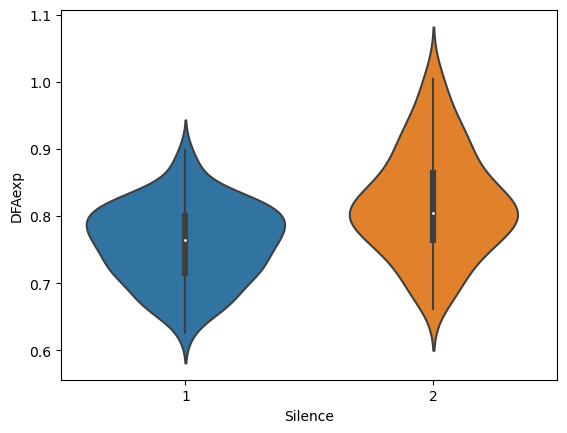

In [212]:
import seaborn as sns
sns.violinplot(data = df_fren, x ='Silence', y ='DFAexp' );

In [112]:
import statsmodels.api as sm
## total group effect!
## opposto effetto in gamma!
import statsmodels.formula.api as smf
md = smf.mixedlm("DFAexp ~Silence", cleans[2], groups=cleans[2]["sub_id"], re_formula="~Silence") ### riscalando per i canali 
# mixed model tenendo conto di identità di canali...
mdf = md.fit(method=["lbfgs"])
print(mdf.summary())

               Mixed Linear Model Regression Results
Model:                 MixedLM     Dependent Variable:     DFAexp  
No. Observations:      574         Method:                 REML    
No. Groups:            32          Scale:                  0.0023  
Min. group size:       14          Log-Likelihood:         826.9333
Max. group size:       20          Converged:              Yes     
Mean group size:       17.9                                        
-------------------------------------------------------------------
                         Coef.  Std.Err.   z    P>|z| [0.025 0.975]
-------------------------------------------------------------------
Intercept                 0.795    0.014 55.035 0.000  0.767  0.824
Silence[T.2]              0.019    0.013  1.497 0.134 -0.006  0.043
Group Var                 0.006    0.036                           
Group x Silence[T.2] Cov -0.003    0.025                           
Silence[T.2] Var          0.005    0.027                       

C:\Users\Benedetta\anaconda3\lib\site-packages\statsmodels\regression\mixed_linear_model.py:2237: ConvergenceWarning: The MLE may be on the boundary of the parameter space.
  warnings.warn(msg, ConvergenceWarning)


In [224]:
DFA_1.shape

(32, 4)

In [240]:
prv = make_lng_dataframe(0,DFA_1_en, DFA_2_en,sub_en, good_sub)

89
189


In [245]:
len(sub_en), len(sub_span),# + dati hai + basso pvalue...
## + dati hai + pvalue tende ad essere basso ma cio nn signifca che tende ad essere signific per forza

(11, 9)

<Axes: xlabel='Silence', ylabel='DFAexp'>

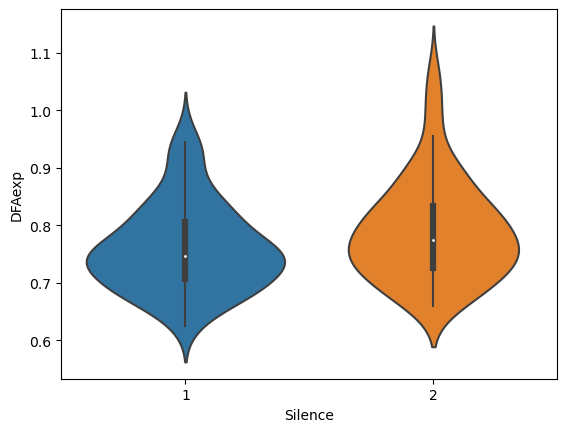

In [241]:
sns.violinplot(prv, x ='Silence', y ='DFAexp')

In [242]:
import statsmodels.formula.api as smf

def stat_test(prv_en):
    
    md = smf.mixedlm("DFAexp ~Silence", prv_en, groups=prv_en["sub_id"], re_formula="~Silence") ### riscalando per i canali 
    # mixed model tenendo conto di identità di canali...
    mdf = md.fit(method=["lbfgs"])
    print(mdf.summary())

In [243]:
stat_test(prv) ##in gamma va verso il basso

               Mixed Linear Model Regression Results
Model:                 MixedLM     Dependent Variable:     DFAexp  
No. Observations:      189         Method:                 REML    
No. Groups:            11          Scale:                  0.0018  
Min. group size:       14          Log-Likelihood:         289.2142
Max. group size:       20          Converged:              Yes     
Mean group size:       17.2                                        
-------------------------------------------------------------------
                         Coef.  Std.Err.   z    P>|z| [0.025 0.975]
-------------------------------------------------------------------
Intercept                 0.759    0.020 37.921 0.000  0.720  0.798
Silence[T.2]              0.030    0.027  1.105 0.269 -0.023  0.082
Group Var                 0.004    0.048                           
Group x Silence[T.2] Cov -0.002    0.049                           
Silence[T.2] Var          0.007    0.086                       

C:\Users\Benedetta\anaconda3\lib\site-packages\statsmodels\regression\mixed_linear_model.py:2237: ConvergenceWarning: The MLE may be on the boundary of the parameter space.
  warnings.warn(msg, ConvergenceWarning)


In [230]:
prv_span = make_lng_dataframe(3,DFA_1_span, DFA_2_span,sub_span, good_sub)

76
164


<Axes: xlabel='Silence', ylabel='DFAexp'>

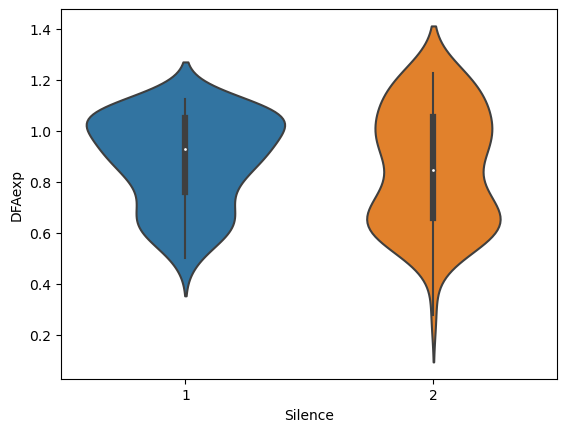

In [231]:
sns.violinplot(prv_span, x ='Silence', y ='DFAexp')

In [234]:
import statsmodels.formula.api as smf

def stat_test(prv_en):
    
    md = smf.mixedlm("DFAexp ~Silence", prv_en, groups=prv_en["sub_id"], re_formula="~Silence") ### riscalando per i canali 
    # mixed model tenendo conto di identità di canali...
    mdf = md.fit(method=["lbfgs"])
    print(mdf.summary())

In [233]:
stat_test(prv_span)

               Mixed Linear Model Regression Results
Model:                 MixedLM     Dependent Variable:     DFAexp  
No. Observations:      164         Method:                 REML    
No. Groups:            9           Scale:                  0.0041  
Min. group size:       16          Log-Likelihood:         176.0438
Max. group size:       20          Converged:              Yes     
Mean group size:       18.2                                        
-------------------------------------------------------------------
                         Coef.  Std.Err.   z    P>|z| [0.025 0.975]
-------------------------------------------------------------------
Intercept                 0.883    0.058 15.284 0.000  0.770  0.997
Silence[T.2]             -0.031    0.067 -0.458 0.647 -0.161  0.100
Group Var                 0.030    0.240                           
Group x Silence[T.2] Cov -0.008    0.198                           
Silence[T.2] Var          0.039    0.321                       

In [110]:
import statsmodels.api as sm
## total group effect!
## opposto effetto in gamma!
import statsmodels.formula.api as smf
md = smf.mixedlm("DFAexp ~Silence", prv_en, groups=prv_en["sub_id"], re_formula="~Silence") ### riscalando per i canali 
# mixed model tenendo conto di identità di canali...
mdf = md.fit(method=["lbfgs"])
print(mdf.summary())

               Mixed Linear Model Regression Results
Model:                 MixedLM     Dependent Variable:     DFAexp  
No. Observations:      574         Method:                 REML    
No. Groups:            32          Scale:                  0.0025  
Min. group size:       14          Log-Likelihood:         767.7663
Max. group size:       20          Converged:              Yes     
Mean group size:       17.9                                        
-------------------------------------------------------------------
                         Coef.  Std.Err.   z    P>|z| [0.025 0.975]
-------------------------------------------------------------------
Intercept                 0.941    0.024 39.685 0.000  0.895  0.987
Silence[T.2]             -0.053    0.030 -1.749 0.080 -0.112  0.006
Group Var                 0.018    0.095                           
Group x Silence[T.2] Cov -0.009    0.091                           
Silence[T.2] Var          0.029    0.155                       

In [119]:
import statsmodels.api as sm
## total group effect!
import statsmodels.formula.api as smf
md = smf.mixedlm("DFAexp ~Silence", cleans[0], groups=cleans[0]["sub_id"], re_formula="~Silence") ### riscalando per i canali 
# mixed model tenendo conto di identità di canali...
mdf = md.fit(method=["lbfgs"])
print(mdf.summary())

               Mixed Linear Model Regression Results
Model:                 MixedLM     Dependent Variable:     DFAexp  
No. Observations:      574         Method:                 REML    
No. Groups:            32          Scale:                  0.0020  
Min. group size:       14          Log-Likelihood:         874.0353
Max. group size:       20          Converged:              Yes     
Mean group size:       17.9                                        
-------------------------------------------------------------------
                         Coef.  Std.Err.   z    P>|z| [0.025 0.975]
-------------------------------------------------------------------
Intercept                 0.758    0.009 82.251 0.000  0.740  0.776
Silence[T.2]              0.050    0.014  3.460 0.001  0.022  0.078
Group Var                 0.002    0.016                           
Group x Silence[T.2] Cov -0.001    0.019                           
Silence[T.2] Var          0.006    0.039                       

C:\Users\Benedetta\anaconda3\lib\site-packages\statsmodels\regression\mixed_linear_model.py:2237: ConvergenceWarning: The MLE may be on the boundary of the parameter space.
  warnings.warn(msg, ConvergenceWarning)


In [45]:
a = 0
for i in t1_span:
    a+= len(i)
print(a)
c = a
#a = 0
for i in t2_span:
    a+= len(i)
print(a, a-c)


278
574 296


In [ ]:
a = 0
for i in tau1s:
    a+= len(i)
print(a)
c = a
#a = 0
for i in tau2s:
    a+= len(i)
print(a, a-c)

In [48]:
32*10*2, #missing values

640

In [47]:
import statsmodels.api as sm

import statsmodels.formula.api as smf
md = smf.mixedlm("tau_c ~Silence", df_total, groups=df_total["sub_id"], re_formula="~Silence") ### riscalando per i canali 
# mixed model tenendo conto di identità di canali....
mdf = md.fit(method=["lbfgs"])
print(mdf.summary())

               Mixed Linear Model Regression Results
Model:                 MixedLM     Dependent Variable:     tau_c   
No. Observations:      574         Method:                 REML    
No. Groups:            32          Scale:                  0.0035  
Min. group size:       14          Log-Likelihood:         725.6966
Max. group size:       20          Converged:              Yes     
Mean group size:       17.9                                        
-------------------------------------------------------------------
                         Coef.  Std.Err.   z    P>|z| [0.025 0.975]
-------------------------------------------------------------------
Intercept                 0.283    0.010 27.765 0.000  0.263  0.303
Silence[T.2]              0.007    0.013  0.544 0.586 -0.019  0.033
Group Var                 0.003    0.015                           
Group x Silence[T.2] Cov -0.001    0.014                           
Silence[T.2] Var          0.005    0.025                       

C:\Users\Benedetta\anaconda3\lib\site-packages\statsmodels\regression\mixed_linear_model.py:2237: ConvergenceWarning: The MLE may be on the boundary of the parameter space.
  warnings.warn(msg, ConvergenceWarning)


In [ ]:
a = 0
for i in t1_span:
    a+= len(i)
print(a)
c = a
#a = 0
for i in t2_span:
    a+= len(i)
print(a, a-c)

In [32]:
df_fren.to_csv("../../../Desktop/Criticality in barrel cortex/EEG avalanche analysis/tau_fren_2ndmeth.csv", index = True)
df_span.to_csv("../../../Desktop/Criticality in barrel cortex/EEG avalanche analysis/tau_span_2ndmeth.csv", index = True)
df_en.to_csv("../../../Desktop/Criticality in barrel cortex/EEG avalanche analysis/tau_en_2ndmeth.csv", index = True)

In [331]:
pd.read_csv("../../../Desktop/Criticality in barrel cortex/EEG avalanche analysis/fren.csv", index_col = 0)

,Silence,tau_c,sub_id,ch
0,1,0.542652,66.0,0.0
1,1,0.518412,66.0,1.0
2,1,0.424604,66.0,2.0
3,1,0.371044,66.0,3.0
4,1,0.370191,66.0,4.0
...,...,...,...,...
216,2,0.487911,56.0,4.0
217,2,0.448473,56.0,5.0
218,2,0.477559,56.0,6.0
219,2,0.503569,56.0,7.0


In [36]:
import statsmodels.api as sm

import statsmodels.formula.api as smf
md = smf.mixedlm("tau_c ~Silence", df_span, groups=df_span["sub_id"], re_formula="~Silence") ### riscalando per i canali 
# mixed model tenendo conto di identità di canali....
mdf = md.fit(method=["lbfgs"])
print(mdf.summary())

               Mixed Linear Model Regression Results
Model:                 MixedLM     Dependent Variable:     tau_c   
No. Observations:      164         Method:                 REML    
No. Groups:            9           Scale:                  0.0044  
Min. group size:       16          Log-Likelihood:         187.6310
Max. group size:       20          Converged:              Yes     
Mean group size:       18.2                                        
-------------------------------------------------------------------
                         Coef.  Std.Err.   z    P>|z| [0.025 0.975]
-------------------------------------------------------------------
Intercept                 0.291    0.017 17.396 0.000  0.258  0.323
Silence[T.2]              0.023    0.028  0.821 0.411 -0.032  0.078
Group Var                 0.002    0.019                           
Group x Silence[T.2] Cov -0.000    0.023                           
Silence[T.2] Var          0.006    0.056                       

C:\Users\Benedetta\anaconda3\lib\site-packages\statsmodels\regression\mixed_linear_model.py:2237: ConvergenceWarning: The MLE may be on the boundary of the parameter space.
  warnings.warn(msg, ConvergenceWarning)


In [35]:
import statsmodels.api as sm

import statsmodels.formula.api as smf
md = smf.mixedlm("tau_c ~Silence", df_en, groups=df_en["sub_id"], re_formula="~Silence") ### riscalando per i canali 
# mixed model tenendo conto di identità di canali....
mdf = md.fit(method=["lbfgs"])
print(mdf.summary())

               Mixed Linear Model Regression Results
Model:                 MixedLM     Dependent Variable:     tau_c   
No. Observations:      189         Method:                 REML    
No. Groups:            11          Scale:                  0.0023  
Min. group size:       14          Log-Likelihood:         274.3412
Max. group size:       20          Converged:              Yes     
Mean group size:       17.2                                        
-------------------------------------------------------------------
                         Coef.  Std.Err.   z    P>|z| [0.025 0.975]
-------------------------------------------------------------------
Intercept                 0.301    0.019 16.018 0.000  0.265  0.338
Silence[T.2]             -0.027    0.018 -1.510 0.131 -0.061  0.008
Group Var                 0.004    0.038                           
Group x Silence[T.2] Cov -0.002    0.029                           
Silence[T.2] Var          0.003    0.032                       

C:\Users\Benedetta\anaconda3\lib\site-packages\statsmodels\regression\mixed_linear_model.py:2237: ConvergenceWarning: The MLE may be on the boundary of the parameter space.
  warnings.warn(msg, ConvergenceWarning)


In [34]:
import statsmodels.api as sm

import statsmodels.formula.api as smf
md = smf.mixedlm("tau_c ~Silence", df_fren, groups=df_fren["sub_id"], re_formula="~Silence") ### riscalando per i canali 
# mixed model tenendo conto di identità di canali....
mdf = md.fit(method=["lbfgs"])
print(mdf.summary())

               Mixed Linear Model Regression Results
Model:                 MixedLM     Dependent Variable:     tau_c   
No. Observations:      221         Method:                 REML    
No. Groups:            12          Scale:                  0.0039  
Min. group size:       16          Log-Likelihood:         266.5707
Max. group size:       20          Converged:              Yes     
Mean group size:       18.4                                        
-------------------------------------------------------------------
                         Coef.  Std.Err.   z    P>|z| [0.025 0.975]
-------------------------------------------------------------------
Intercept                 0.262    0.016 15.889 0.000  0.229  0.294
Silence[T.2]              0.026    0.022  1.154 0.249 -0.018  0.069
Group Var                 0.003    0.023                           
Group x Silence[T.2] Cov -0.001    0.022                           
Silence[T.2] Var          0.005    0.042                       

C:\Users\Benedetta\anaconda3\lib\site-packages\statsmodels\regression\mixed_linear_model.py:2237: ConvergenceWarning: The MLE may be on the boundary of the parameter space.
  warnings.warn(msg, ConvergenceWarning)


In [30]:
a = 0
for i in t1_en:
    a+= len(i)
print(a)

#a = 0
for i in t2_en:
    a+= len(i)
a

89


189

In [282]:
import scipy.stats as stats 

stats.ttest_rel(t1_en, t2_en, alternative = 'greater')

TtestResult(statistic=1.2080650160523068, pvalue=0.12740772526048091, df=10)

In [283]:
len(t1_en)

11